<a href="https://colab.research.google.com/github/matthew-long601/Machine-Learning-Project/blob/main/CapstoneProjectLogisticRegress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import packages
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [ ]:
from tensorflow.keras import layers
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
np.set_printoptions(precision=3, suppress=True)

In [ ]:
train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '50k']
raw_dataset = pd.read_csv(train, names=column_names, na_values='?', comment='\t', sep=',', skipinitialspace=True)


In [ ]:
dataset = raw_dataset.copy()
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(dataset[['50k']]).toarray())

#merge one-hot encoded columns back with original DataFrame
dataset = dataset.join(encoder_df)

dataset.drop('50k', axis=1, inplace=True)

dataset.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '<=50k', '>50k']
dataset


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,<=50k,>50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1.0,0.0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0.0,1.0
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1.0,0.0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1.0,0.0


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=2)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('>50k')
test_labels = test_features.pop('>50k')

In [ ]:
ed = np.array(train_features['education-num'])

normalizer = layers.Normalization(input_shape=[1,], axis=None)
normalizer.adapt(ed)

In [ ]:
# Training Parameters
batchSize = 128
nEpochs = 50

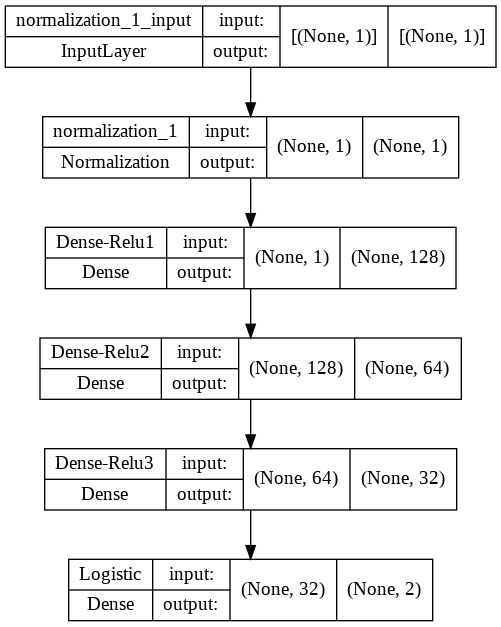

In [ ]:
# Building a feed-forward network
model = tf.keras.Sequential() # empty model

model.add(normalizer)

# Layer1 is a dense layer
numUnits_L1 =128
layer1 = tf.keras.layers.Dense(units=numUnits_L1, activation=tf.nn.relu, use_bias=True,name='Dense-Relu1')
model.add(layer1)

# Layer2 is a dense layer
numUnits_L2 =64
layer2 = tf.keras.layers.Dense(units=numUnits_L2, activation=tf.nn.relu, use_bias=True,name='Dense-Relu2')
model.add(layer2)

numUnits_L3 =32
layer3 = tf.keras.layers.Dense(units=numUnits_L3, activation=tf.nn.relu, use_bias=True,name='Dense-Relu3')
model.add(layer3)

# Layer3 is the output layer
numUnits_L4 = 2
layer4 = tf.keras.layers.Dense(units=numUnits_L4, activation=tf.nn.softmax, use_bias=True, name='Logistic')
model.add(layer4)

# Compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy']) #'sparse_categorical_crossentropy'

# Plot Logistic Regression Network
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
trHistory = model.fit(x=train_features['education-num'], y=train_labels, batch_size=batchSize, epochs=nEpochs, shuffle=False, validation_split=0.2)

Epoch 1/50
163/163 [==============================] - 1s 4ms/step - loss: 0.5198 - accuracy: 0.7611 - val_loss: 0.4946 - val_accuracy: 0.7701
Epoch 2/50
163/163 [==============================] - 0s 3ms/step - loss: 0.4944 - accuracy: 0.7744 - val_loss: 0.4930 - val_accuracy: 0.7770
Epoch 3/50
163/163 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.7753 - val_loss: 0.4926 - val_accuracy: 0.7770
Epoch 4/50
163/163 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.7753 - val_loss: 0.4925 - val_accuracy: 0.7770
Epoch 5/50
163/163 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7762 - val_loss: 0.4924 - val_accuracy: 0.7770
Epoch 6/50
163/163 [==============================] - 0s 3ms/step - loss: 0.4931 - accuracy: 0.7768 - val_loss: 0.4923 - val_accuracy: 0.7770
Epoch 7/50
163/163 [==============================] - 0s 3ms/step - loss: 0.4930 - accuracy: 0.7770 - val_loss: 0.4922 - val_accuracy: 0.7770
Epoch 

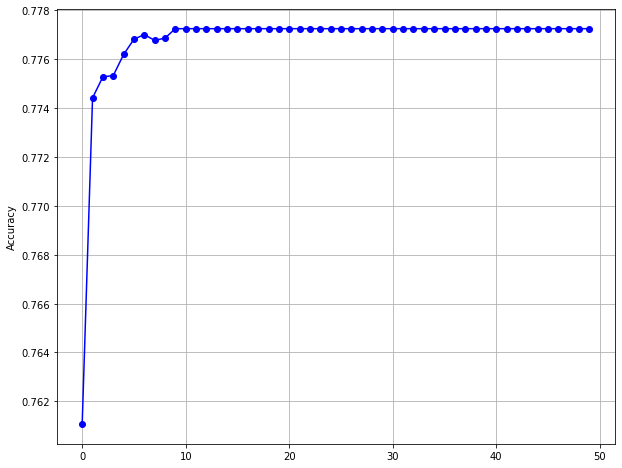

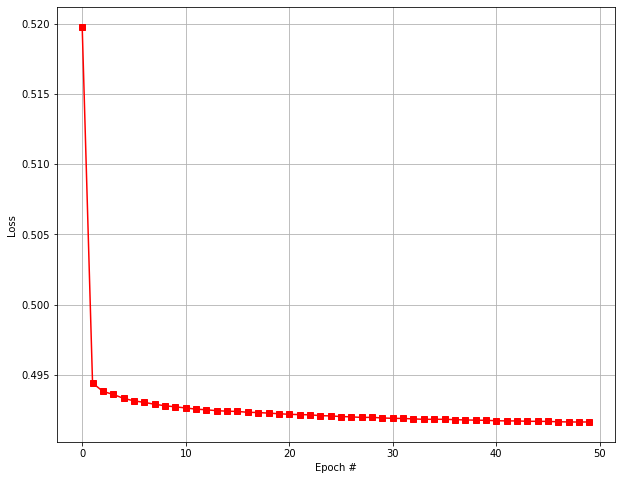

In [ ]:
plt.figure(1, figsize=(10,8))
plt.plot(trHistory.history['accuracy'], 'b-o')
#plt.plot(trHistory.history['loss'])
plt.grid(True)
# plt.xlabel('Epoch #')
plt.ylabel("Accuracy")

plt.figure(2, figsize=(10,8))
plt.plot(trHistory.history['loss'],'r-s')
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Loss")
plt.show()

In [ ]:
testHistory = model.fit(x=test_features['education-num'], y=test_labels, batch_size=batchSize, epochs=nEpochs, shuffle=False, validation_split=0.2)

Epoch 1/50
41/41 [==============================] - 0s 4ms/step - loss: 0.4743 - accuracy: 0.7902 - val_loss: 0.4669 - val_accuracy: 0.7851
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 0.4742 - accuracy: 0.7902 - val_loss: 0.4671 - val_accuracy: 0.7851
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7902 - val_loss: 0.4671 - val_accuracy: 0.7851
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7902 - val_loss: 0.4673 - val_accuracy: 0.7851
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.7902 - val_loss: 0.4674 - val_accuracy: 0.7851
Epoch 6/50
41/41 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.7902 - val_loss: 0.4675 - val_accuracy: 0.7851
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 0.4740 - accuracy: 0.7902 - val_loss: 0.4675 - val_accuracy: 0.7851
Epoch 8/50
41/41 [==